In [1]:
from netCDF4 import Dataset
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import train_test_split

with Dataset("simObsInclined_1.0.dm_dist.nc") as fh:
    yobsL=fh["tb"][:,:]
    x2D=fh["iwc"][:,:]
    zKu=fh["zKu"][:,:]
    
nt,nchan=yobsL.shape
yobsL+=np.random.randn(nt,nchan)*3

ind_train,ind_test,y_train, y_test = train_test_split(range(nt), x2D[:].sum(axis=-1)*0.24, test_size=0.33, random_state=42)
nt,nc=yobsL.shape
X_train=yobsL[ind_train,:]
X_test=yobsL[ind_test,:]
iwc_train=x2D[ind_train,:]
iwc_test=x2D[ind_test,:]
zKu_train=zKu[ind_train,:]
zKu_test=zKu[ind_test,:]

# import kmeans
from sklearn.cluster import KMeans
nc=36 # number of clusters
kmeans = KMeans(n_clusters=nc, random_state=0).fit(X_train)
kmeans_iwc=KMeans(n_clusters=nc, random_state=0).fit(iwc_train)
#kmeans_zKu=KMeans(n_clusters=nc, random_state=0).fit(zKu_train)

    
#neigh = KNeighborsRegressor(n_neighbors=30,weights='distance')
#neigh.fit(X_train, y_train)



In [2]:
y_classL=[]
for i in range(nc):
    a=np.nonzero(kmeans.labels_==i)[0]
    y_classL.append(y_train[a].mean())

y_classL=np.array(y_classL)
y_=y_classL[kmeans.predict(X_test)]
print(np.corrcoef(y_test,y_)[0,1])

0.6071165792716263


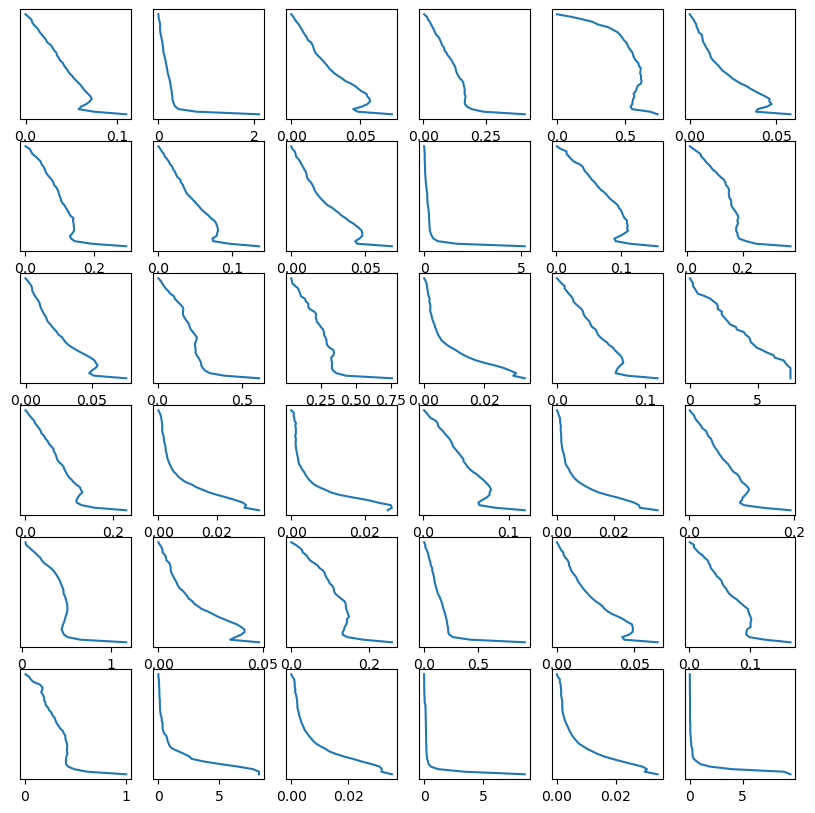

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(6):
    for j in range(6):
        ax=plt.subplot(6,6,i*6+j+1)
        #ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        a=np.nonzero(kmeans.labels_==i*6+j)[0]
        if len(a)>0:
            plt.plot(iwc_train[a,:].mean(axis=0),range(40))

In [24]:
iwcClasses=[[]for k in range(nc)]
iwcClassesOcc=[[]for k in range(nc)]
for i in range(nc):
    a=np.nonzero(kmeans.labels_==i)[0]
    for k in kmeans_iwc.labels_[a]:
        if k not in iwcClasses[i]:
            iwcClasses[i].append(k)
            iwcClassesOcc[i].append(1)
        else:
            iwcClassesOcc[i][iwcClasses[i].index(k)]+=1
            
# find element k in list iwcClasses[i]
            

[[3459, 3], [163, 92, 5, 188, 14, 17, 212, 9, 23, 2, 12, 5, 13, 11, 11, 6, 4, 3, 6, 1, 6, 4, 2, 1, 1, 2], [3204, 84, 6, 8], [91, 139, 366, 206, 75, 34, 95, 6], [588, 293, 201, 42, 175, 72, 21, 3], [71, 159, 53, 28, 5, 2, 3, 1, 2, 1, 2, 2, 1], [702, 719, 390, 198, 9], [3433, 101, 7, 8], [3006, 42, 3], [3249, 71, 3, 2], [446, 603, 184, 95, 73, 31], [2471, 281, 39, 42], [489, 634, 132, 142, 31, 15], [78, 140, 13, 12, 15, 25, 11, 19, 118, 21, 12, 3, 1, 53, 9, 10, 3, 17, 8, 5, 7, 6, 11, 15, 12, 2, 7, 11, 2, 3, 2], [141, 255, 154, 62, 167, 142, 9, 4, 1, 5, 24, 1, 3, 3, 2, 4, 2, 2, 2], [2918], [3482], [263, 206, 130, 129, 13, 22, 16, 1, 3, 2, 4, 2, 4, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1], [14, 7, 2, 5, 6, 2, 6, 4, 12, 3, 1, 7, 6, 10, 7, 2, 3, 2, 4, 1, 8, 1], [524, 241, 1422, 135], [644, 407, 70, 126, 155, 47, 11], [658, 1142, 339, 158], [3501], [170, 312, 172, 138, 56, 104, 6, 18, 4, 2, 2, 1, 3, 1], [656, 484, 617, 217, 1], [75, 457, 189, 135, 257, 100, 2, 17, 12], [765, 627, 194, 191, 42, 15], [542

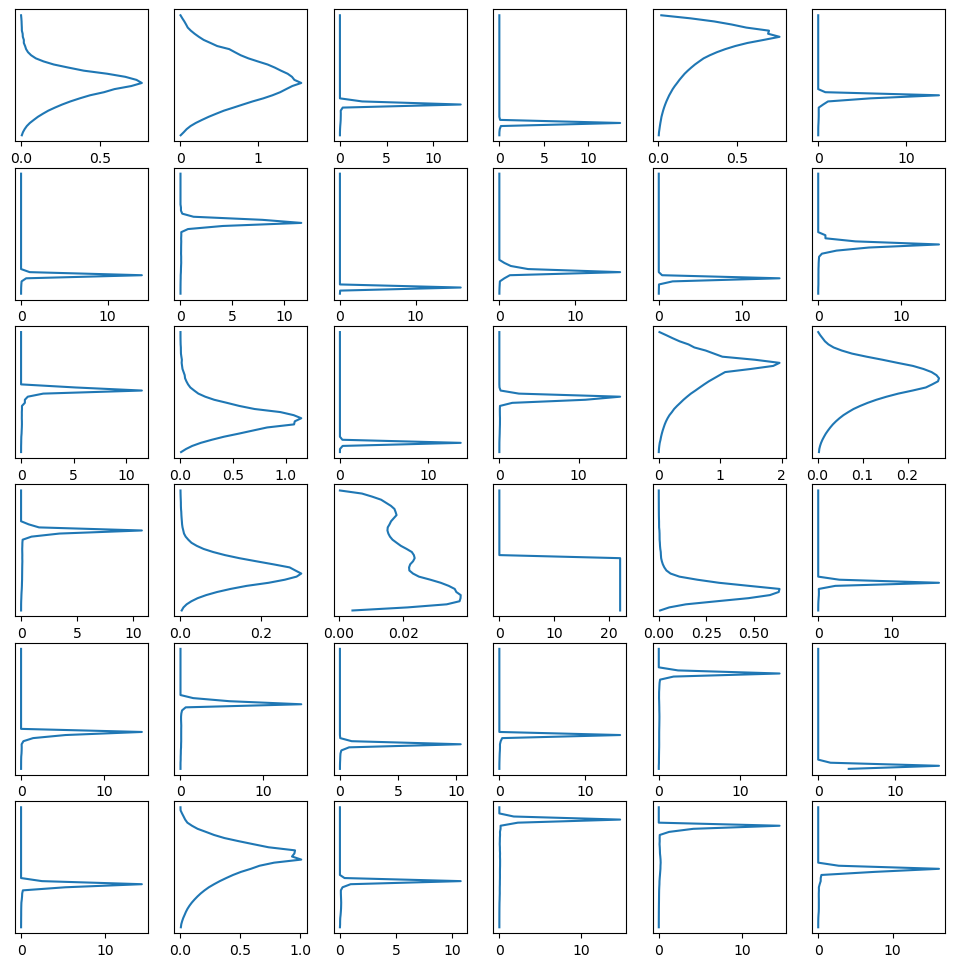

In [26]:
for i in range(nc):
    ind=np.argmax(iwcClassesOcc[i])
    #print(i,iwcClasses[i][ind],iwcClassesOcc[i][ind])
print(iwcClassesOcc)
print(iwcClasses)
plt.figure(figsize=(12,12))
for i in range(6):
    for j in range(6):
        ax=plt.subplot(6,6,i*6+j+1)
        #ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        a=np.nonzero(kmeans_iwc.labels_==i*6+j)[0]
        if len(a)>0:
            plt.plot(iwc_train[a,:].mean(axis=0),range(40))